### Group Number 2221
Alessandro Maria Capodaglio, Sarvenaz Babakhani, Reza Rajaee, Elham Khosravi

In [2]:
from IPython.display import display

# PERFORMANCE AT VARIOUS SIGNAL TO NOISE RATIOS

## RESULTS

The original, unchanged model was trained on various signal-to-noise ratios. 
This ratio is controlled by the parameter **A** which is the amplitude of the signal.
By increasing **A** the amount of "pattern" in the generated dataset is more so we would expect the performance of the model trained on datasets which have a bigger signal-to-noise ratio to be better. 
For simplicity of reading the results are in the cell below, as expected the performance of the model gets progressively better with bigger **A**s.

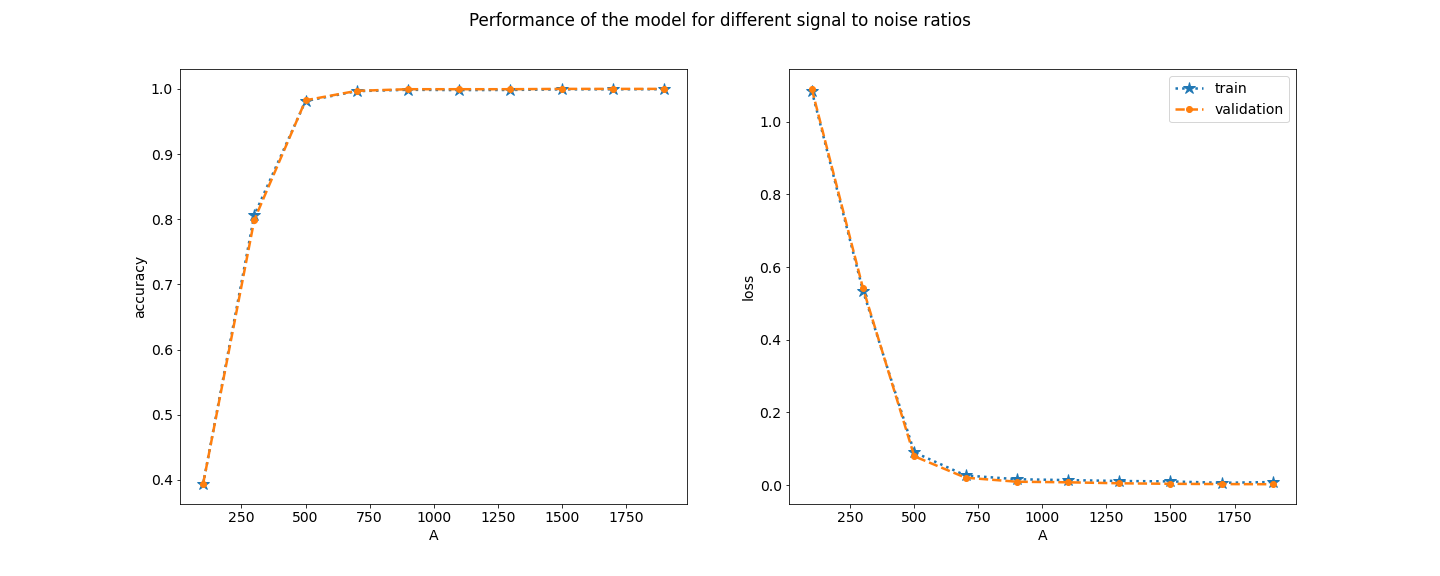

In [3]:
from IPython import display # need this import again for unclear reasons
display.Image(filename='performance_at_last_epoch_different_A.png') 

# REGULARIZATION STUDY

## RESULTS

We tested the original model with L1, L2 and L1L2 regularization, for different values of the regularization parameter **λ**. Loosely speaking this parameter controls the trade-off between a simpler/more flexible model (**high λ**), which comes with the risk of underfitting and a more complex model (with no regularization, **λ = 0**), which comes at the risk of overfitting.
We then represented the train and test accuracies at the last epoch for different values of lambda. 
For readability the results are represented below.

As can be seen the best accuracies obtained in all cases correspond to a value of **λ = 10e-3**.

### L1

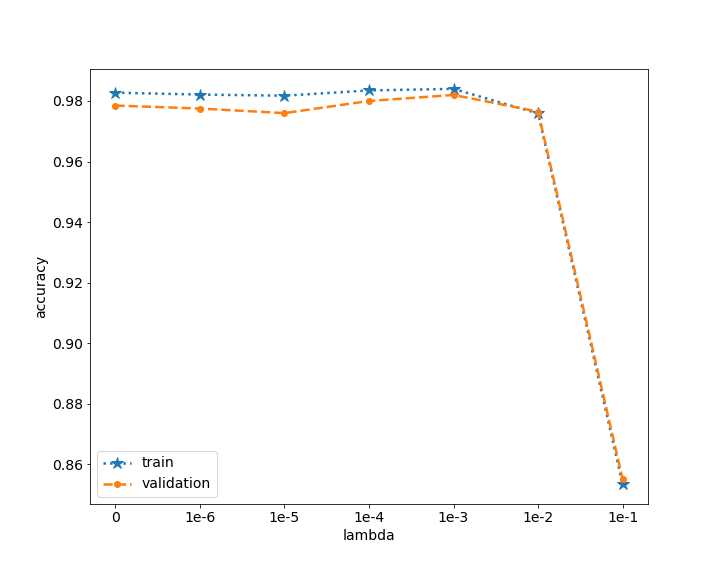

In [8]:
from IPython import display
display.Image(filename='plot_lambda_l1.png')

### L2

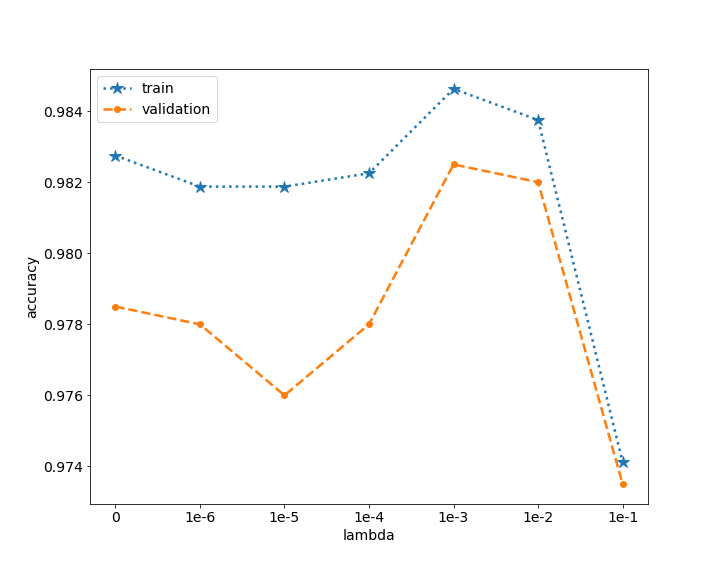

In [6]:
from IPython import display
display.Image(filename='plot_lambda_l2.png') 

### L1L2

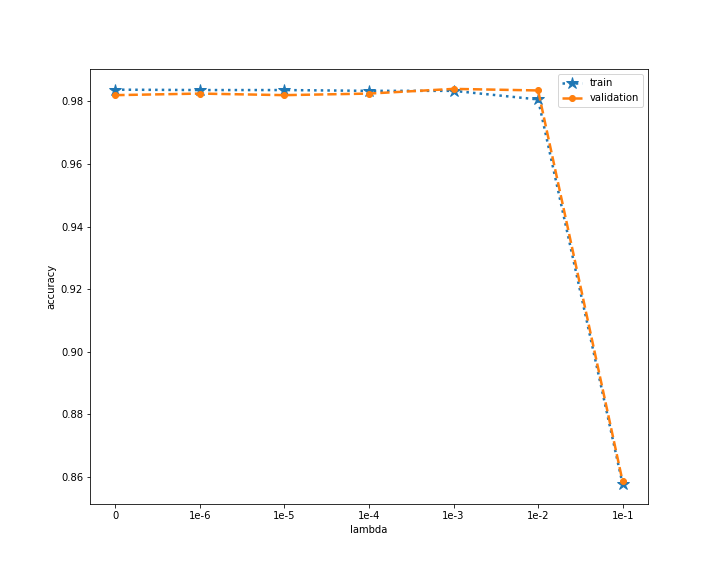

In [1]:
from IPython import display
display.Image(filename='./plot_lambda_l1l2.png') 

Subsequently it was pondered wheter an improvement in the visualization and understanding of the weights could be seen in the filters. The figures below show the weights determined by the fitting in the case of best values of lambda. This question was not answered clearly, in the sense that, in an ideal world, only two filters of the layers would "survive" after the optimization procedure. This is because the patterns we want the CNN to recognize are in fact the "upward" pattern and the "downward" pattern. The best value of the regularization parameter **λ** for both L1 and L2 regularization does not give fruit to such a visual interpretation.

### L1

In [13]:
from IPython import display
display.Image(filename='./DATA/fig_layer 0_lambda 6.png') 

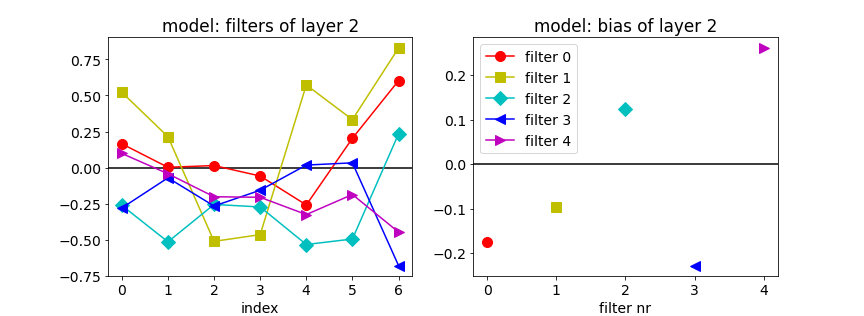

In [14]:
from IPython import display
display.Image(filename='./DATA/fig_layer 2_lambda 6.png') 

### L2

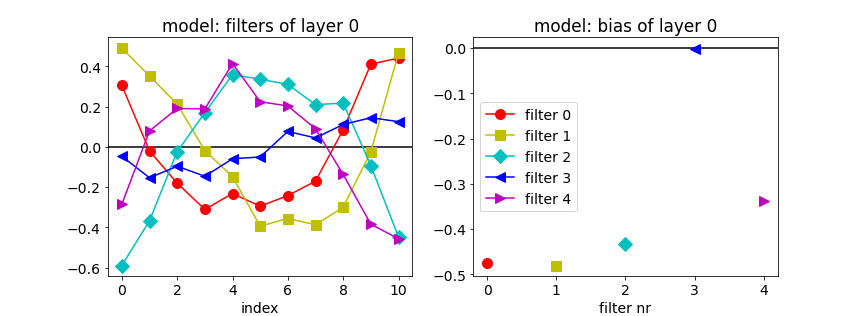

In [16]:
from IPython import display
display.Image(filename='./DATA/fig_layer 0_lambda 6_l2.png') 

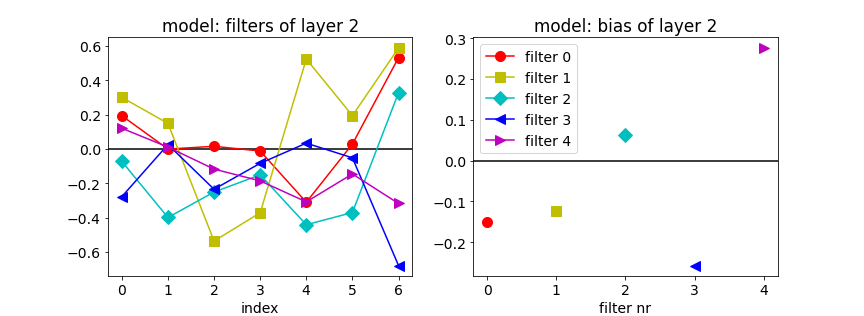

In [17]:
from IPython import display
display.Image(filename='./DATA/fig_layer 2_lambda 6_l2.png') 

### L1L2

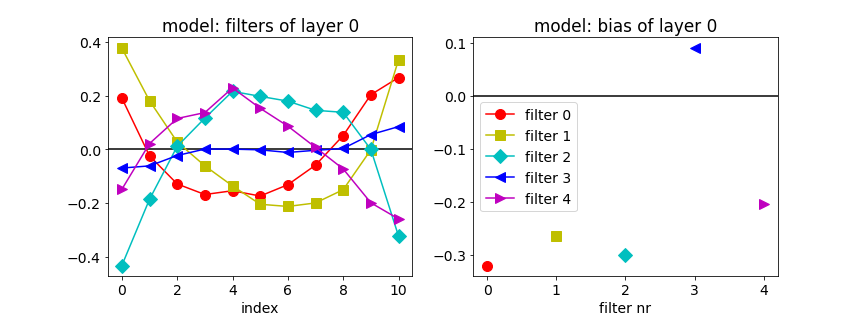

In [4]:
from IPython import display
display.Image(filename='./DATA/fig_layer 0_lambda 6_l2l1.png') 

In [5]:
from IPython import display
display.Image(filename='./DATA/fig_layer 2_lambda 6_l2l1.png') 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten #, Reshape
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D

%run plot.py

#This part must be run un-commented once, and then be removed. Then the rest of the notebook can
#be run 10 times (without resetting the kernel) by manually changing the value of A in the cell below.

list_of_train_acc=[0,0,0,0,0,0,0,0,0,0]
list_of_valid_acc=[0,0,0,0,0,0,0,0,0,0]
list_of_Trainloss=[0,0,0,0,0,0,0,0,0,0]
list_of_Validloss=[0,0,0,0,0,0,0,0,0,0]
list_of_best_index=[0,0,0,0,0,0,0,0,0,0]
A_list = [100, 300, 500, 700, 900, 1100, 1300, 1500, 1700, 1900]


In [7]:
A = 1900

# Generate data

In [8]:
np.random.seed(12345)

# function for the random step, using lambda construction
# int() for cleaner look and for mimiking a detector with finite resolution
jump = lambda drift, stdev: int(np.random.normal(drift,stdev))

for i in range(10):
    print(jump(5,50))

-5
28
-20
-22
103
74
9
19
43
67


In [10]:
def pattern(i,z,a):
    return int(a*np.sin((np.pi*i)/z))

[0, -5, 23, 3, -19, 84, 158, 167, 186, 229, 296, 351, 292, 310, 326, 398, 447, 352, 339, 427, 411, 390, 418, 585, 539, 516, 527, 547, 578, 583, 655, 625, 589, 476, 388, 350, 383, 325, 335, 287, 308, 196, 192, 120, 77, 17, 36, 59, 27, 48, 120, 128, 145, 149, 204, 275, 235, 163, 169, 211] 0
[183, 231, 235, 242, 280, 327, 285, 288, 669, 1100, 1439, 1680, 1928, 2034, 2008, 1873, 1551, 1131, 632, 110, 126, 133, 81, 126, 152, 207, 303, 259, 306, 305, 355, 369, 482, 482, 587, 593, 637, 647, 615, 649, 661, 588, 565, 568, 527, 508, 511, 570, 624, 600, 684, 663, 690, 741, 668, 622, 607, 623, 619, 657] 1
[580, 623, 678, 663, 597, 579, 558, 521, 610, 643, 134, -283, -630, -843, -1106, -1210, -1095, -956, -631, -211, 286, 783, 751, 706, 825, 746, 794, 774, 749, 796, 798, 793, 831, 835, 777, 810, 841, 801, 790, 777, 894, 865, 828, 836, 837, 826, 839, 855, 854, 851, 785, 799, 883, 811, 830, 807, 807, 804, 789, 732] 2


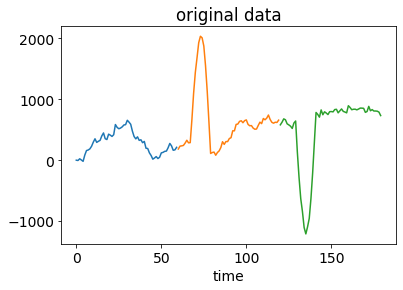

In [11]:
# random seed for reproducibility
np.random.seed(12345)

# pattern parameters: Z=nr of steps, A=amplitude
Z=12
# number of data samples
N=10000
# size of each sample of the timeseries
L=60
# step parameters: introduce small positive bias 
DX = 50
bias = 5

y = [0] * N #10000 zeros
x = [[0] * L for i in range(N)] #each sample has size 60, we create 10000 samples
for i in range(N):
    if i>0: #start at 1, zero is always zero
        x[i][0] = x[i-1][-1] + jump(bias,DX) # new point is obtained by jump from previous point
    for j in range(1,L):
        x[i][j] = x[i][j-1] + jump(bias,DX) 
    y[i] = i%3 
    ##y[i] = random.randint(0,2)
    if y[i]>0:
        j0 = np.random.randint(0,L-1-Z)
        ###print(i,j0,j1)
        sign = 3-2*y[i]
        for j in range(Z):
            x[i][j0+j] += sign*pattern(j,Z,A)
            
for i in range(min(3,N)):
    print(x[i],y[i])
    

Show_data(x,L,"original data")

In [12]:
# command in linux
!mkdir DATA
str0 = f'ts_L{L}_Z{Z}_A{A}_DX{DX}_bias{bias}_N{N}.dat'
print(str0)

fname='DATA/x_'+str0
np.savetxt(fname,x,fmt="%d")
fname='DATA/y_'+str0
np.savetxt(fname,y,fmt="%d")

mkdir: cannot create directory ‘DATA’: File exists
ts_L60_Z12_A1900_DX50_bias5_N10000.dat


### Read data

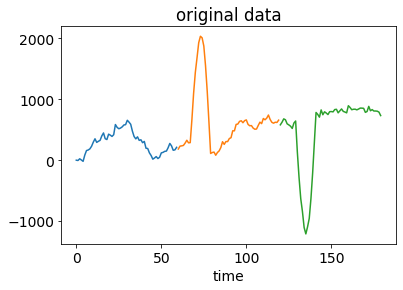

data:  10000


In [13]:
fnamex='DATA/x_'+str0
fnamey='DATA/y_'+str0

x = np.loadtxt(fnamex, delimiter=" ",dtype=float)
N,L = len(x), len(x[0])

Show_data(x,L,"original data")

categ = np.loadtxt(fnamey, dtype=int)
n_class = 3    # y.argmax() - y.argmin() +1
print('data: ',N)

y = np.zeros((N,n_class))
for i in range(N):
    y[i][categ[i]] = 1.

### Rescale data, split train/val.

N_train= 8000   N_val= 2000   L= 60   n_class= 3


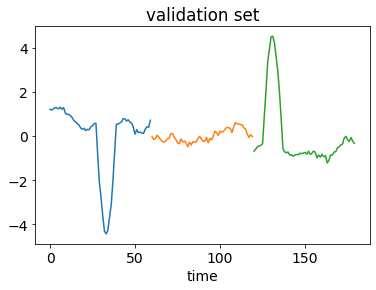

In [14]:
#
#  FIRST PASSAGE:  DO NOT DO THIS --> FAILURE 
#
#remove average value of each sample from its values

xm = x.mean(axis=1)
for i in range(N):
    x[i] = x[i]-xm[i]
    
#
#  SECOND PASSAGE:  DO NOT DO THIS --> ALSO FAILURE 
#
#rescale (crude version, variance should be used)
x = x/400
    
Show_data(x,L,"rescaled data")

perc_train=0.8
N_train = int(perc_train*N)
x_train = x[:N_train]
y_train = y[:N_train]
x_val = x[N_train:]
y_val = y[N_train:]
N_val = len(x_val)
print('N_train=',N_train,'  N_val=',N_val,'  L=',L,'  n_class=',n_class)

#x_train=x_train.astype("float32")
#y_train=y_train.astype("float32")
#x_val=x_val.astype("float32")
#y_val=y_val.astype("float32")

# Keras wants an additional dimension with a 1 at the end
x_train = x_train.reshape(x_train.shape[0], L, 1)
x_val =  x_val.reshape(x_val.shape[0], L, 1)
input_shape = (L, 1)

Show_data(x_train, L, "training set")
Show_data(x_val, L, "validation set")

## Convolutional NN

In [15]:
# ... LESSON ...



np.random.seed(12345)


import tensorflow.random as tf_r
tf_r.set_seed(12345)



from keras import regularizers, initializers

reg = regularizers.l2(0.02) #ridge with lambda = 0.02
#reg = regularizers.l2(0.01) #lasso with lambda = 0.1


ini = keras.initializers.RandomNormal(mean = 0.0, stddev = 0.05, seed = None)

NCONV = 1
NF = 5 #number of filters


model = Sequential()

if NCONV ==1: 
    model.add(Conv1D(filters = NF, 
                     kernel_size = 11, 
                     kernel_initializer = ini, 
                     kernel_regularizer = reg,
                     activation = 'relu', 
                     input_shape = input_shape))
    #model.add(MaxPooling1D(3))
    model.add(AveragePooling1D(5))  #maybe too much (?)
    model.add(Conv1D(filters = 5, kernel_size = 7, activation = 'relu'))
    model.add(Flatten())
    model.add(Dense(12, activation = 'relu'))
    model.add(Dropout(0.2))

model.add(Dense(n_class, activation = 'softmax'))


print('---Model', NCONV, '---')
print(model.summary())



opt = tf.keras.optimizers.Adam()

model.compile(loss = keras.losses.categorical_crossentropy, optimizer = opt, metrics = ['accuracy'])



---Model 1 ---
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 50, 5)             60        
                                                                 
 average_pooling1d (AverageP  (None, 10, 5)            0         
 ooling1D)                                                       
                                                                 
 conv1d_1 (Conv1D)           (None, 4, 5)              180       
                                                                 
 flatten (Flatten)           (None, 20)                0         
                                                                 
 dense (Dense)               (None, 12)                252       
                                                                 
 dropout (Dropout)           (None, 12)                0         
                                         

In [181]:
model.layers

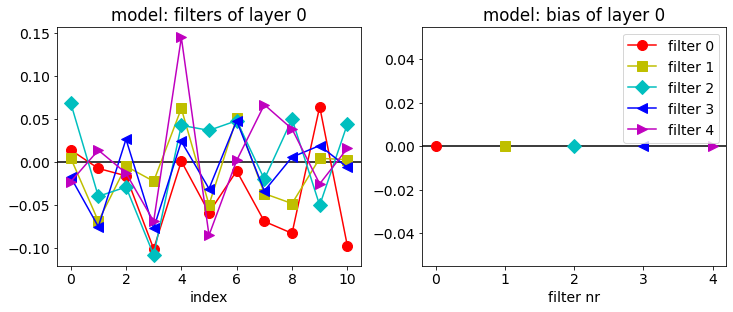

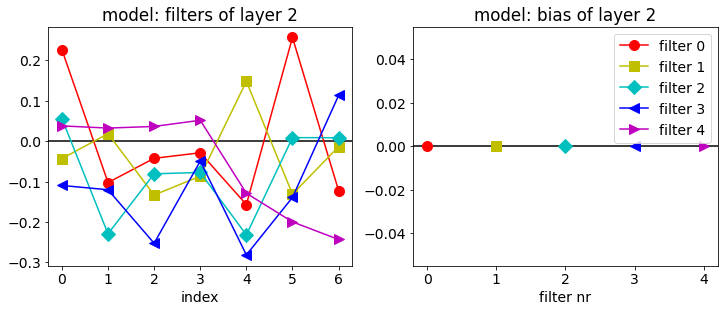

In [17]:
def Show_weights(model,l=0,label="model"):
    c=['r','y','c','b','m']
    m=['o','s','D','<','>']
    ms=10
    
    w = model.layers[l].get_weights()[0]
    wT=w.T
    M=len(wT)
    b = model.layers[l].get_weights()[1]
    
    fig,AX=plt.subplots(1,2,figsize=(12,4.4))
    ax=AX[0]
    ax.axhline(0, c="k")
    ax.plot((0,))
    for i in range(M):
        ax.plot(wT[i][0],"-",c=c[i],marker=m[i],label=str(i),markersize=ms)
    ax.set_title(label+': filters of layer '+str(l))
    ax.set_xlabel('index')
    ax=AX[1]
    ax.axhline(0, c="k")
    for i in range(M):
        ax.plot((i),(b[i]),c=c[i],marker=m[i],label="filter "+str(i),markersize=ms)
    ax.set_title(label+': bias of layer '+str(l))
    ax.set_xlabel('filter nr')
    ax.set_xticks(np.arange(5))
    ax.legend()
    plt.show()
    
Show_weights(model,0)
Show_weights(model,2)

In [18]:
# ...LESSON ...



BATCH_SIZE = 250
EPOCHS = 100

print('---Model ', NCONV, '---\nFITTING...')
fit = model.fit(x_train, y_train,
                batch_size = BATCH_SIZE,
                epochs = EPOCHS,
                validation_data = (x_val, y_val),
                verbose = 2,
                shuffle = True)


---Model  1 ---
FITTING...
Epoch 1/100
32/32 - 2s - loss: 1.0895 - accuracy: 0.3817 - val_loss: 1.0589 - val_accuracy: 0.4245 - 2s/epoch - 58ms/step
Epoch 2/100
32/32 - 0s - loss: 0.9941 - accuracy: 0.5405 - val_loss: 0.8967 - val_accuracy: 0.6915 - 129ms/epoch - 4ms/step
Epoch 3/100
32/32 - 0s - loss: 0.8062 - accuracy: 0.7381 - val_loss: 0.6821 - val_accuracy: 0.8495 - 128ms/epoch - 4ms/step
Epoch 4/100
32/32 - 0s - loss: 0.6032 - accuracy: 0.8289 - val_loss: 0.4459 - val_accuracy: 0.9080 - 133ms/epoch - 4ms/step
Epoch 5/100
32/32 - 0s - loss: 0.4089 - accuracy: 0.8959 - val_loss: 0.2461 - val_accuracy: 0.9785 - 130ms/epoch - 4ms/step
Epoch 6/100
32/32 - 0s - loss: 0.2596 - accuracy: 0.9456 - val_loss: 0.1317 - val_accuracy: 0.9890 - 121ms/epoch - 4ms/step
Epoch 7/100
32/32 - 0s - loss: 0.1802 - accuracy: 0.9653 - val_loss: 0.0813 - val_accuracy: 0.9955 - 127ms/epoch - 4ms/step
Epoch 8/100
32/32 - 0s - loss: 0.1387 - accuracy: 0.9771 - val_loss: 0.0572 - val_accuracy: 0.9960 - 129ms/

Epoch 67/100
32/32 - 0s - loss: 0.0151 - accuracy: 0.9987 - val_loss: 0.0041 - val_accuracy: 1.0000 - 135ms/epoch - 4ms/step
Epoch 68/100
32/32 - 0s - loss: 0.0143 - accuracy: 0.9987 - val_loss: 0.0040 - val_accuracy: 1.0000 - 137ms/epoch - 4ms/step
Epoch 69/100
32/32 - 0s - loss: 0.0134 - accuracy: 0.9989 - val_loss: 0.0041 - val_accuracy: 1.0000 - 148ms/epoch - 5ms/step
Epoch 70/100
32/32 - 0s - loss: 0.0122 - accuracy: 0.9994 - val_loss: 0.0040 - val_accuracy: 1.0000 - 161ms/epoch - 5ms/step
Epoch 71/100
32/32 - 0s - loss: 0.0131 - accuracy: 0.9994 - val_loss: 0.0043 - val_accuracy: 1.0000 - 157ms/epoch - 5ms/step
Epoch 72/100
32/32 - 0s - loss: 0.0133 - accuracy: 0.9989 - val_loss: 0.0038 - val_accuracy: 1.0000 - 131ms/epoch - 4ms/step
Epoch 73/100
32/32 - 0s - loss: 0.0125 - accuracy: 0.9991 - val_loss: 0.0038 - val_accuracy: 1.0000 - 129ms/epoch - 4ms/step
Epoch 74/100
32/32 - 0s - loss: 0.0130 - accuracy: 0.9991 - val_loss: 0.0037 - val_accuracy: 1.0000 - 132ms/epoch - 4ms/step


In [19]:
list_of_Trainloss[A_list.index(A)]=fit.history['loss'][-1]
list_of_Validloss[A_list.index(A)]=fit.history['val_loss'][-1]
list_of_train_acc[A_list.index(A)]=fit.history['accuracy'][-1]
list_of_valid_acc[A_list.index(A)]=fit.history['val_accuracy'][-1]


In [20]:
np.savetxt("Trainloss_last_epoch",list_of_Trainloss)
np.savetxt("Validloss_last_epoch",list_of_Validloss)
np.savetxt("TrainAcc_last_epoch",list_of_train_acc)
np.savetxt("ValidAcc_last_epoch",list_of_valid_acc)

In [21]:
train_losses = np.loadtxt("Trainloss_last_epoch")
valid_losses = np.loadtxt("Validloss_last_epoch")
train_accuracies = np.loadtxt("TrainAcc_last_epoch")
valid_accuracies = np.loadtxt("ValidAcc_last_epoch")

print(train_losses)
print(valid_losses)    
print(train_accuracies)      
print(valid_accuracies)      

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00859364]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00257299]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.99949998]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,8))
fig.suptitle('Performance of the model for different signal to noise ratios')
ax1.plot(A_list, train_accuracies, label = 'train', linestyle = 'dotted', marker = '*', markersize = 12,linewidth ='2.5')
ax1.plot(A_list, valid_accuracies, label = 'validation',linestyle = 'dashed', marker = '.',markersize = 12, linewidth ='2.5')
ax1.set_xlabel('A')
ax1.set_ylabel('accuracy')
ax2.plot(A_list, train_losses, label = 'train', linestyle = 'dotted', marker = '*', markersize = 12,linewidth ='2.5')
ax2.plot(A_list, valid_losses, label = 'validation',linestyle = 'dashed', marker = '.',markersize = 12, linewidth ='2.5')
ax2.set_xlabel('A')
ax2.set_ylabel('loss')

plt.legend(loc = 'best')
#plt.savefig('performance_at_last_epoch_different_A.png')

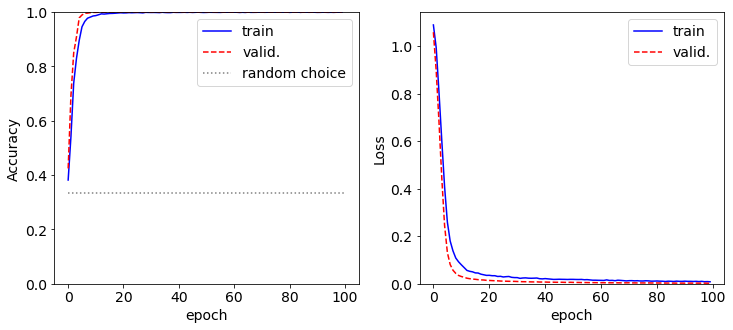

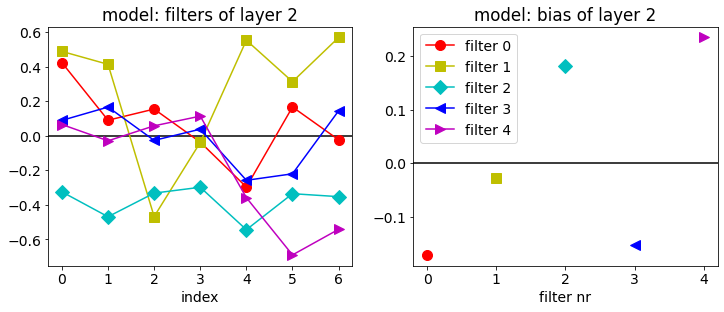

In [23]:
def Show_history(fit):
    fig,AX=plt.subplots(1,2,figsize=(12,5.))
    ax=AX[0]
    ax.plot(fit.history['accuracy'],"b",label="train")
    ax.plot(fit.history['val_accuracy'],"r--",label="valid.")
    ax.plot((0,EPOCHS),(1/3,1/3),":",c="gray",label="random choice")
    ax.set_xlabel('epoch')
    ax.set_ylabel("Accuracy")
    ax.set_ylim([0, 1])
    ax.legend()
    ax=AX[1]
    ax.plot(fit.history['loss'],"b",label="train")
    ax.plot(fit.history['val_loss'],"r--",label="valid.")
    ax.set_xlabel('epoch')
    ax.set_ylabel("Loss")
    ax.set_ylim([0, 1.05*np.max(fit.history['loss'])])
    ax.legend()
    plt.show()
Show_history(fit)
Show_weights(model,0)
Show_weights(model,2)

In [ ]:
import pandas as pd
from scipy import stats

import seaborn 
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn import preprocessing

LABELS = ["absent","positive","negative"]
cmap="GnBu"

def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(6, 5))
    seaborn.heatmap(matrix,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d',
                linecolor='white',
                linewidths=1,
                cmap=cmap)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

y_pred_val = model.predict(x_val)
# Take the class with the highest probability from the val predictions
max_y_pred_val = np.argmax(y_pred_val, axis=1)
max_y_val = np.argmax(y_val, axis=1)

show_confusion_matrix(max_y_val, max_y_pred_val)

#print(classification_report(max_y_val, max_y_pred_val))

## This next part is for the study regarding the regularization

In [1]:
#initializing
#this block should be run once , for the other process from the third block of the jupyter, it should be run

list_of_Trainacc_l1=[0,0,0,0,0,0,0,0,0,0]
list_of_Validacc_l1=[0,0,0,0,0,0,0,0,0,0]
lambdaa2=[]

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten #, Reshape
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D

%run plot.py

In [3]:
#Here we define all the values of lambda we check. Note that a "initialization error" in the order of 
#the powers of 10  (10^-1 closer to 0 than 10^-6) was made
#this was accounted for in the final plot through array slicing, instead of re-running everything.
lambdaa=[100,10,1,0,10**(-1),10**(-2),10**(-3),10**(-4),10**(-5),10**(-6)]
lambdaa2.append(lambdaa[len(lambdaa2)])
lambdi=lambdaa2[-1]
print(lambdi)

100


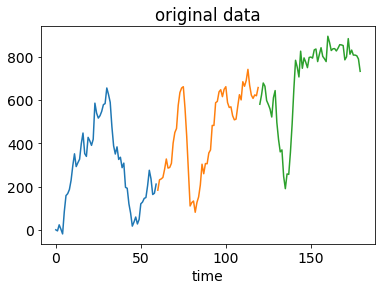

data:  10000


In [4]:
A=500
str0 = f'ts_L60_Z12_A{A}_DX50_bias5_N10000.dat'
fnamex='DATA/x_'+str0
fnamey='DATA/y_'+str0

x = np.loadtxt(fnamex, delimiter=" ",dtype=float)
N,L = len(x), len(x[0])

Show_data(x,L,"original data")

categ = np.loadtxt(fnamey, dtype=int)
n_class = 3    # y.argmax() - y.argmin() +1
print('data: ',N)

y = np.zeros((N,n_class))
for i in range(N):
    y[i][categ[i]] = 1.

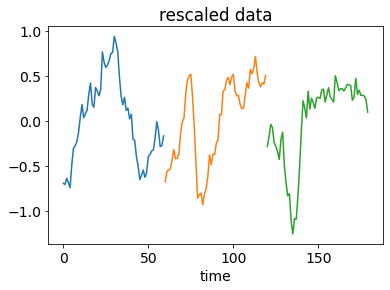

N_train= 8000   N_val= 2000   L= 60   n_class= 3


In [5]:
#
#  FIRST PASSAGE:  DO NOT DO THIS --> FAILURE 
#
#remove average value of each sample from its values
xm = x.mean(axis=1)
for i in range(N):
    x[i] = x[i]-xm[i]

#
#  SECOND PASSAGE:  DO NOT DO THIS --> ALSO FAILURE 
#
#rescale (crude version, variance should be used)
x = x/400
    
Show_data(x,L,"rescaled data")

perc_train=0.8
N_train = int(perc_train*N)
x_train = x[:N_train]
y_train = y[:N_train]
x_val = x[N_train:]
y_val = y[N_train:]
N_val = len(x_val)
print('N_train=',N_train,'  N_val=',N_val,'  L=',L,'  n_class=',n_class)

#x_train=x_train.astype("float32")
#y_train=y_train.astype("float32")
#x_val=x_val.astype("float32")
#y_val=y_val.astype("float32")

# Keras wants an additional dimension with a 1 at the end
x_train = x_train.reshape(x_train.shape[0], L, 1)
x_val =  x_val.reshape(x_val.shape[0], L, 1)
input_shape = (L, 1)

In [6]:
np.random.seed(12345)
import tensorflow.random as tf_r
tf_r.set_seed(12345)

## from keras import regularizers, initializers

reg = tf.keras.regularizers.l1(lambdi) ## raised to 0.2
#reg = regularizers.l1(0.1)
ini = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, 
                                        seed=None)
NCONV = 1
NF = 5

# challenge: at most 600 tunable parameters
model = Sequential()
# 
if NCONV==1:
    # -----2-----
    model.add(Conv1D(filters=NF, kernel_size=11, 
                     kernel_initializer=ini, 
                     kernel_regularizer=reg,
                     activation='relu', 
                     input_shape=input_shape))
    #model.add(MaxPooling1D(3))
    model.add(AveragePooling1D(5))
    model.add(Conv1D(filters=5, kernel_size=7, 
                     activation='relu'))
    model.add(Flatten())
    model.add(Dense(12, activation='relu'))
    model.add(Dropout(0.2))
# 
if NCONV==2:
    # -----1-----
    model.add(Conv1D(filters=NF, kernel_size=11, 
                     kernel_initializer=ini, 
                     kernel_regularizer=reg, ######## TRY WITHOUT !
                     activation='relu', input_shape=input_shape))
    #model.add(MaxPooling1D(3))
    model.add(AveragePooling1D(5))
    model.add(Flatten())
    model.add(Dense(9, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(6, activation='relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(10, activation='relu'))
    #model.add(Dropout(0.3))
model.add(Dense(n_class, activation='softmax')) # softmax !

print('----- Model',NCONV,'-----')
print(model.summary())

# optimizers
# .SGD(lr=0.01, momentum=0.9, nesterov=True) # decay=1e-6,
# .RMSprop()
# .Nadam()
opt = tf.keras.optimizers.Adam()

# compile the model
# categorical_crossentropy, 3 output nodes
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=opt,metrics=['accuracy'])

----- Model 1 -----
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 50, 5)             60        
                                                                 
 average_pooling1d (AverageP  (None, 10, 5)            0         
 ooling1D)                                                       
                                                                 
 conv1d_1 (Conv1D)           (None, 4, 5)              180       
                                                                 
 flatten (Flatten)           (None, 20)                0         
                                                                 
 dense (Dense)               (None, 12)                252       
                                                                 
 dropout (Dropout)           (None, 12)                0         
                                    

In [7]:
model.layers

In [ ]:
def Show_weights(model,l=0,label="model",a='0'):
    c=['r','y','c','b','m']
    m=['o','s','D','<','>']
    ms=10
    
    w = model.layers[l].get_weights()[0]
    wT=w.T
    M=len(wT)
    b = model.layers[l].get_weights()[1]
    
    fig,AX=plt.subplots(1,2,figsize=(12,4.4))
    ax=AX[0]
    ax.axhline(0, c="k")
    ax.plot((0,))
    for i in range(M):
        ax.plot(wT[i][0],"-",c=c[i],marker=m[i],label=str(i),markersize=ms)
    ax.set_title(label+': filters of layer '+str(l))
    ax.set_xlabel('index')
    ax=AX[1]
    ax.axhline(0, c="k")
    for i in range(M):
        ax.plot((i),(b[i]),c=c[i],marker=m[i],label="filter "+str(i),markersize=ms)
    ax.set_title(label+': bias of layer '+str(l))
    ax.set_xlabel('filter nr')
    ax.set_xticks(np.arange(5))
    ax.legend()
    plt.savefig('fig_layer '+str(l)+'_lambda '+str(a)+'.png')
    plt.show()


In [ ]:
BATCH_SIZE = 250
EPOCHS = 100

print('----- Model ',NCONV,'-----\nFITTING....')
fit = model.fit(x_train,y_train,batch_size=BATCH_SIZE,
                epochs=EPOCHS,
                validation_data=(x_val, y_val),
                verbose=2, shuffle=True) 

In [ ]:
def Show_history(fit):
    fig,AX=plt.subplots(1,2,figsize=(12,5.))
    ax=AX[0]
    ax.plot(fit.history['accuracy'],"b",label="train")
    ax.plot(fit.history['val_accuracy'],"r--",label="valid.")
    ax.plot((0,EPOCHS),(1/3,1/3),":",c="gray",label="random choice")
    ax.set_xlabel('epoch')
    ax.set_ylabel("Accuracy")
    ax.set_ylim([0, 1])
    ax.legend()
    ax=AX[1]
    ax.plot(fit.history['loss'],"b",label="train")
    ax.plot(fit.history['val_loss'],"r--",label="valid.")
    ax.set_xlabel('epoch')
    ax.set_ylabel("Loss")
    ax.set_ylim([0, 1.05*np.max(fit.history['loss'])])
    ax.legend()
    plt.show()
Show_history(fit)
Show_weights(model,0,a=len(lambdaa2)-1)
Show_weights(model,2,a=len(lambdaa2)-1)
list_of_Trainacc_l1[len(lambdaa2)-1]=fit.history['accuracy'][-1]
list_of_Validacc_l1[len(lambdaa2)-1]=fit.history['val_accuracy'][-1]
print(list_of_Trainacc_l1)
print(list_of_Validacc_l1)



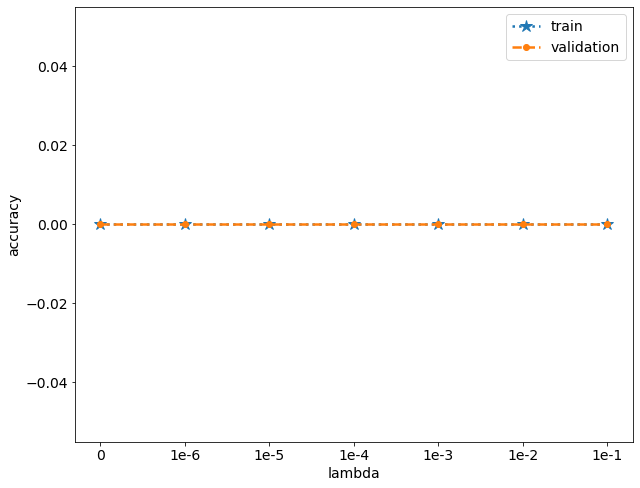

In [11]:
TYPE=1
def filename(s,TYPE=1):
    return "./DATA/"+s+"-for-DNN-"+str(TYPE)+".dat"
#print("Trainacc",list_of_Trainacc_l1)
#print("Validacc",list_of_Validacc_l1)
x = np.loadtxt(filename("Trainacc_lambda_l1",TYPE))
y = np.loadtxt(filename("Validacc_lambda_l1",TYPE))

#lambdaa=[1e-2,1e-3,1e-4,1e-5,1e-6]
m=[0,1,2,3,4,5,6]
lambdaa1=['0','1e-6','1e-5','1e-4','1e-3','1e-2','1e-1']
x_new = np.append(x[3], np.flip(x[4:10]))
y_new = np.append(y[3], np.flip(y[4:10]))

fig, ax = plt.subplots(figsize = (10,8))
ax.plot(m, x_new, label = 'train', linestyle = 'dotted', marker = '*', markersize = 12,linewidth ='2.5')
ax.plot(m, y_new, label = 'validation',linestyle = 'dashed', marker = '.',markersize = 12, linewidth ='2.5')
ax.set_xlabel('lambda')
ax.set_ylabel('accuracy')
#plt.xticks(m,size=10)
ax.set_xticks(m)

ax.set_xticklabels(lambdaa1)

plt.legend(loc = 'best')
#plt.savefig('plot_lambda_l1.png')
